# <span style="color:orange; font-family:PT Sans Narrow; font-size:1.31em"> Importing Packages </span>

In [2]:
%reload_ext autoreload
%autoreload 2

import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import sys
sys.path.append('../../')

from my_main_code.utils import funcs 
from my_main_code.utils import load_data
import pandas as pd
import warnings
import mlflow

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

import seaborn as sns
sns.set(font_scale=1.1, palette='colorblind', style='darkgrid', context='paper')

warnings.filterwarnings('ignore')

%reload_ext my_main_code.utils.load_data
%reload_ext my_main_code.utils.funcs

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1.31em"> 1 Loading the Data </span>

In [3]:
dataset_dict = {1:'kr-vs-kp', 
                2:'mushroom',
                3:'iris',
                4:'spambase',
                5:'tic-tac-toe',
                6:'sick', 
                7:'waveform',
                8:'car', 
                9:'vote',
                10:'ionosphere'} 

dataset = dataset_dict[2]

np.random.seed(0)
data, feature_columns = load_data.aim1_3_read_download_UCI_database(WHICH_DATASET=dataset, mode='read_arff')  # mode='read'

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> MLFlow setup </span>

In [10]:
mlflow_setup = funcs.AIM1_3_MLFLOW_SETUP(experiment_name='aim1_3_final_results')

MLFLOW_MODE='LOADING_OLD_SIMULATION' # NEW_SIMULATION , RE_RUNNING_OLD_SIMULATION , LOADING_OLD_SIMULATION
mlflow_setup.get_simulation(run_name='mushroom', mlflow_mode=MLFLOW_MODE, download_artifacts=True)





************************************************
Access is restricted to AUTHORIZED USERS only! If
you are not authorized LEAVE NOW!
************************************************



bind [::1]:5000: Address already in use
channel_setup_fwd_listener_tcpip: cannot listen to port: 5000
Could not request local forwarding.


setting the tracking URI
setting/creating the experiment


<Run: data=<RunData: metrics={}, params={'dataset': 'mushroom',
 'high_dis': '1',
 'low_dis': '0.4',
 'nlabelers_list': 'range(3, 10)',
 'num_seeds': '6',
 'num_simulations': '10'}, tags={'dataset': 'mushroom',
 'mlflow.note.content': 'run_id: ddcd9f8362954afeb3c09533928f8b83',
 'mlflow.runName': 'mushroom',
 'mlflow.source.git.commit': '6b9037ed0fe9231ebe690daaa27e360ba36567c7',
 'mlflow.source.name': '1.3.2_running_on_benchmarks.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'artin'}>, info=<RunInfo: artifact_uri='sftp://artinmajdi@data7-db1.cyverse.org:/home/artinmajdi/mlflow_data/artifact_store/ddcd9f8362954afeb3c09533928f8b83/artifacts', end_time=1645530566500, experiment_id='34', lifecycle_stage='active', run_id='ddcd9f8362954afeb3c09533928f8b83', run_uuid='ddcd9f8362954afeb3c09533928f8b83', start_time=1645420022737, status='FINISHED', user_id='artin'>>

In [11]:
p = mlflow_setup.mlflow_ui(VIEW_PORT=6789)

MLFlow UI is already running on localhost:6789


Connection to localhost port 6789 [tcp/smc-https] succeeded!


# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 2. Tables for single database </span>

In [12]:
aim1_3_jn_da = funcs.Aim1_3_Data_Analysis_Results(dataset=dataset, mlflow_setup=mlflow_setup, re_plot=True, upload_artifact=True, data=data, feature_columns=feature_columns)

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 2.1 Calculating the accuracy for proposed & benchmarks  </span>

In [13]:
LOAD_OLD_PARAMS = ( MLFLOW_MODE in ('LOADING_OLD_SIMULATION' , 'RE_RUNNING_OLD_SIMULATION') )
aim1_3_jn_da.get_parameters(run=mlflow_setup.run, load_old_params=LOAD_OLD_PARAMS)
 
outputs = aim1_3_jn_da.get_outputs(mode='LOADING_FROM_LOCAL')

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 2.2 Estimated weights </span>

In [14]:
weights = aim1_3_jn_da.get_weights(worker_index=-1, seed_ix=0)

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 2.3 Showing the results for each seed </span>

In [15]:
aim1_3_jn_da.avg_accuracy_over_all_seeds()

In [16]:
aim1_3_jn_da.accuracy_seeds['freq'][f'NL{aim1_3_jn_da.nlabelers_list[-1]}'].round(decimals=2)

,proposed,proposed_penalized,Tao,Sheng,MV_Classifier,GoldMajorityVote,MajorityVote,MMSR,Wawa,ZeroBasedSkill,GLAD,DawidSkene
seed_num,,,,,,,,,,,,
0,0.98,0.99,0.96,0.96,0.96,0.72,0.68,0.83,0.68,0.68,0.81,0.80
1,0.98,0.98,0.97,0.97,0.97,0.78,0.78,0.84,0.78,0.78,0.84,0.84
2,0.99,0.99,0.97,0.97,0.97,0.95,0.90,0.98,0.93,0.94,0.98,0.98
3,0.99,0.99,0.99,0.99,0.99,1.00,0.98,1.00,1.00,1.00,1.00,1.00
4,0.99,0.99,0.99,0.99,0.99,0.96,0.95,0.98,0.96,0.96,0.98,0.98
5,0.99,0.99,0.98,0.98,0.98,0.92,0.87,0.97,0.90,0.91,0.97,0.97


## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 2.4 Final results - average over all seeds </span>

In [17]:
aim1_3_jn_da.accuracy['freq'].round(decimals=2)

,proposed,proposed_penalized,Tao,Sheng,MV_Classifier,GoldMajorityVote,MajorityVote,MMSR,Wawa,ZeroBasedSkill,GLAD,DawidSkene
nlabelers,,,,,,,,,,,,
NL3,0.98,0.98,0.97,0.97,0.97,0.80,0.80,0.87,0.80,0.80,0.80,0.79
NL4,0.98,0.98,0.98,0.96,0.97,0.87,0.80,0.88,0.87,0.87,0.87,0.87
NL5,0.98,0.99,0.98,0.98,0.98,0.87,0.84,0.90,0.84,0.84,0.90,0.90
NL6,0.99,0.99,0.98,0.92,0.93,0.89,0.83,0.78,0.89,0.89,0.91,0.91
NL7,0.95,0.99,0.95,0.95,0.95,0.88,0.85,0.92,0.86,0.86,0.91,0.91
NL8,0.99,0.99,0.98,0.96,0.96,0.90,0.85,0.93,0.90,0.90,0.92,0.93
NL9,0.99,0.99,0.98,0.98,0.98,0.89,0.86,0.93,0.87,0.88,0.93,0.93


# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 3. Figures </span>

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 3.1 Comparing the proposed METHODS  </span>

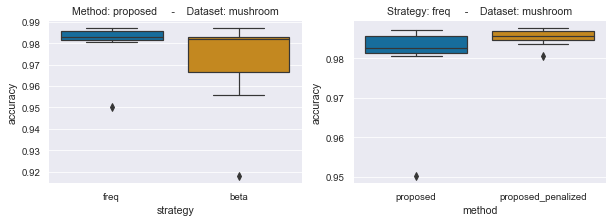

In [18]:
aim1_3_jn_da.plot_new_comparing_proposed_methods(re_plot=True)

In [19]:
aim1_3_jn_da.accuracy['freq'][['proposed','proposed_penalized']]

,proposed,proposed_penalized
nlabelers,,
NL3,0.980513,0.980513
NL4,0.982256,0.983692
NL5,0.982667,0.985436
NL6,0.985436,0.986462
NL7,0.950154,0.985641
NL8,0.987179,0.987692
NL9,0.985538,0.987179


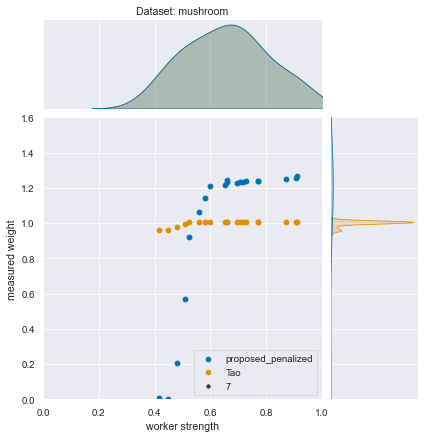

In [20]:
aim1_3_jn_da.plot_new_worker_weight_strength_relation(re_plot=True, smooth=True, seed=1, interpolation_pt_count=1000,  num_labelers=20)

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 3.2 Accuracy distribution using kernel density function  </span>

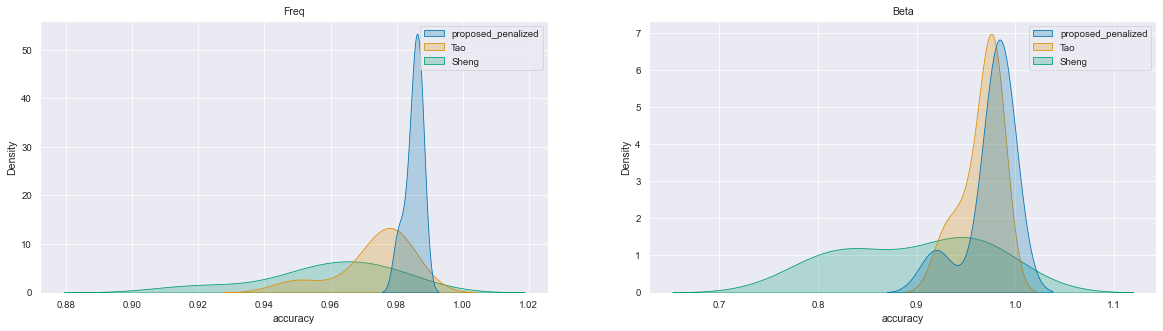

In [21]:
aim1_3_jn_da.plot_new_comparing_proposed_with_Tao_Sheng_MV(re_plot=True)

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 3.3 Average accuracies across different technigues for different # of workers  </span>

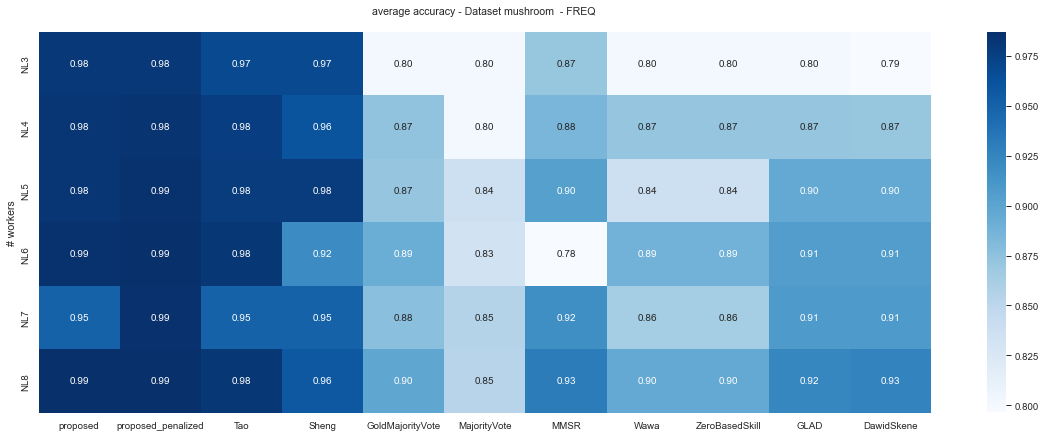

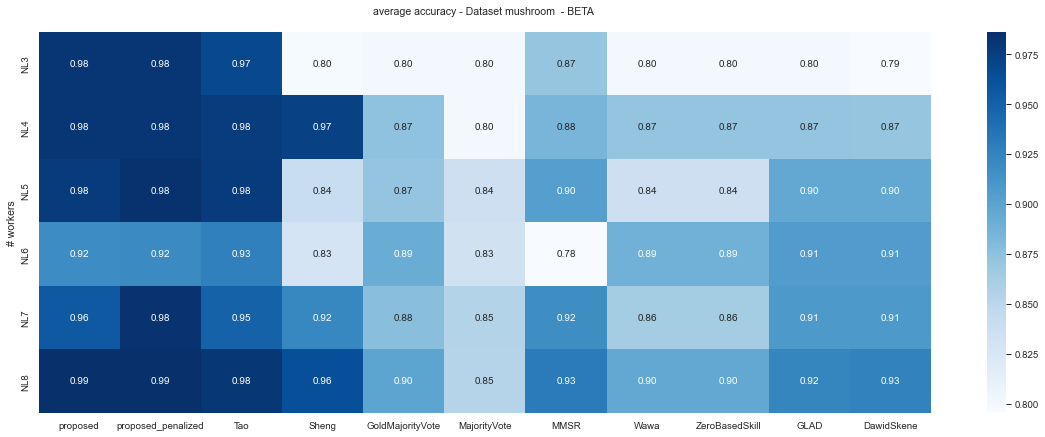

In [22]:
aim1_3_jn_da.plot_new_comparing_proposed_with_all_benchmarks(re_plot=True)

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 3.4 Distribution of average accuracies across different technigues for # workers smaller than six   </span>

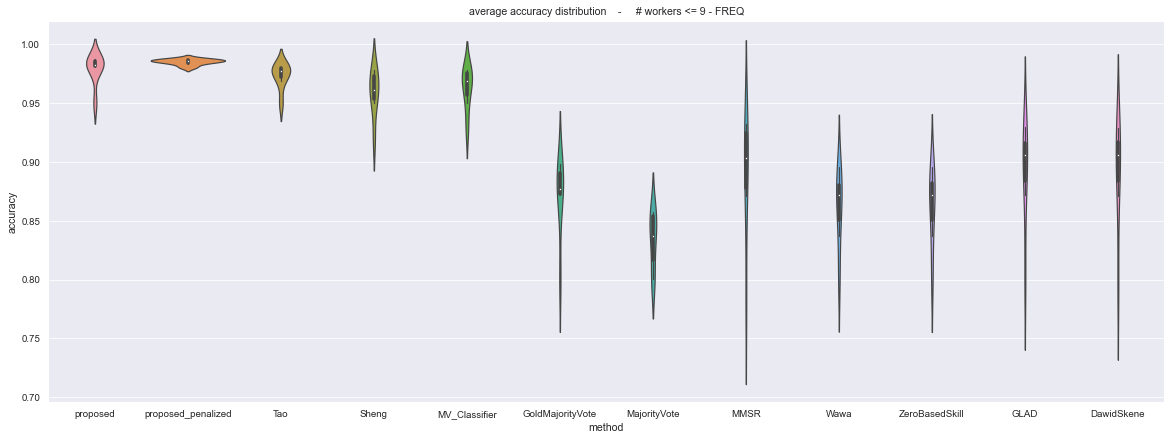

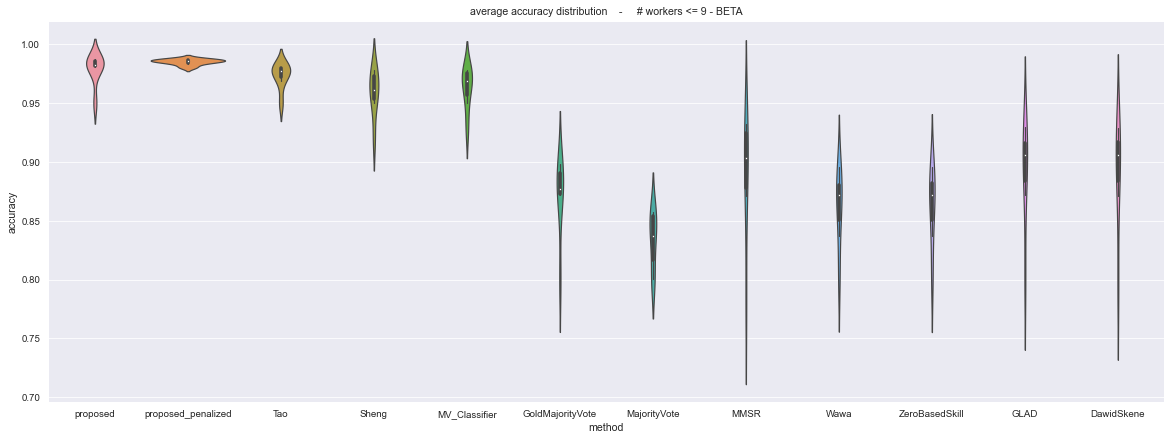

In [23]:
aim1_3_jn_da.plot_new_comparing_proposed_with_all_benchmarks_distribution(re_plot=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 3. Other Figures </span>

## <span style="font-family:PT Sans Narrow; font-size:0.7em; color:lightblue"> 3.1 Comparing the METHOD 1 & 2  </span>

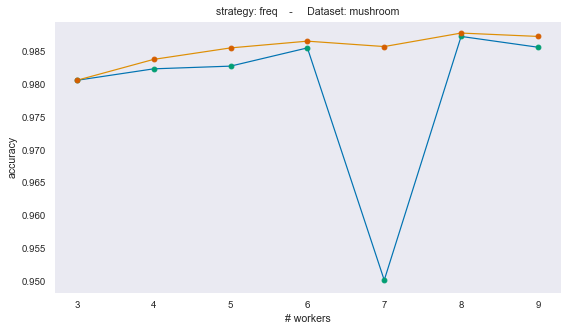

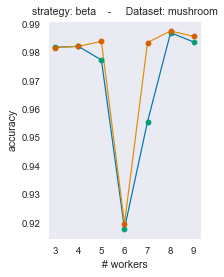

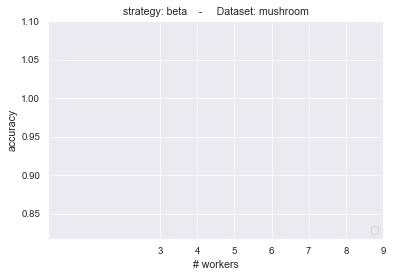

In [24]:
aim1_3_jn_da.plot_comparing_proposed_methods_1_2(re_plot=True, smooth=True)

<AxesSubplot:xlabel='nlabelers', ylabel='accuracy'>

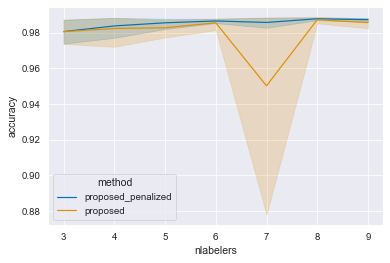

In [25]:
columns = ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed']
df = aim1_3_jn_da.accuracy_seeds_stacked['freq'][columns]
df = df.melt(id_vars=['seed_num', 'nlabelers'], var_name='method', value_name='accuracy')

sns.lineplot(data=df, x='nlabelers', y='accuracy', hue='method', markers=True)

In [26]:
# columns = ['seed_num', 'nlabelers', 'proposed', 'proposed_penalized']

# sns.lineplot(x='nlabelers', y='seed_num' , data=aim1_3_jn_da.accuracy_seeds_stacked['freq'][columns], legend=True)

### <span style="font-family:PT Sans Narrow; font-size:1em"> 3.2 Comparing the FREQ & BETA  </span>

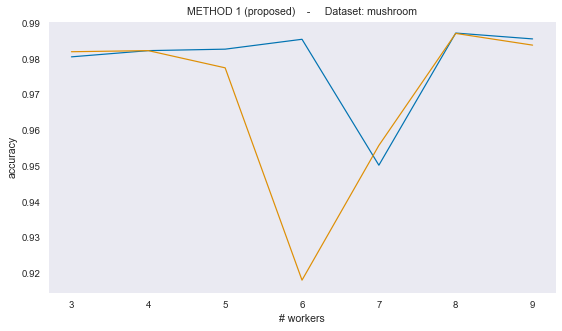

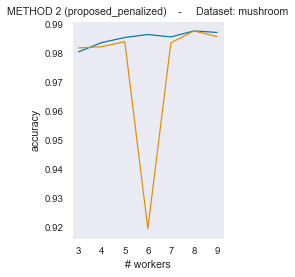

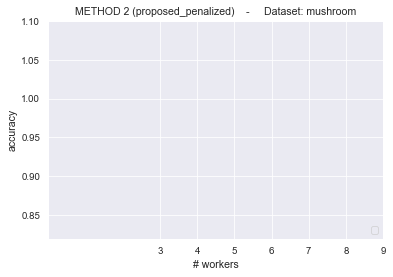

In [27]:
aim1_3_jn_da.plot_comparing_proposed_methods_freq_beta(re_plot=True, smooth=True)

### <span style="font-family:PT Sans Narrow; font-size:1em"> 3.3 Comparing with Tao & Sheng  </span>

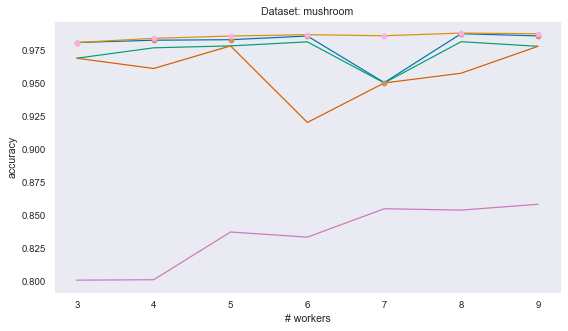

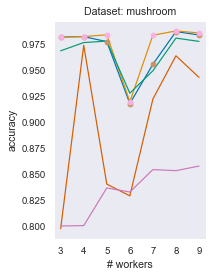

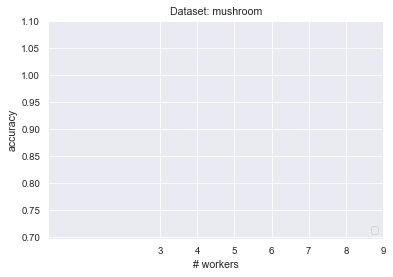

In [28]:
aim1_3_jn_da.plot_comparing_proposed_with_Tao_Sheng_MV(re_plot=True, smooth=True)

### <span style="font-family:PT Sans Narrow; font-size:1em"> 3.4 FREQ:  Comparing with all benchmarks  </span>

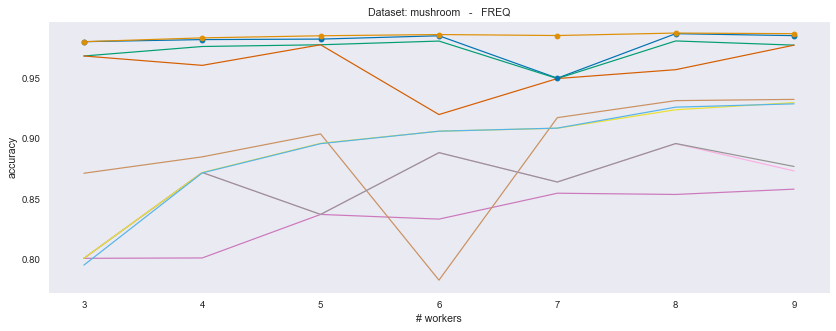

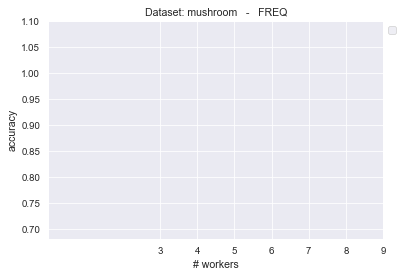

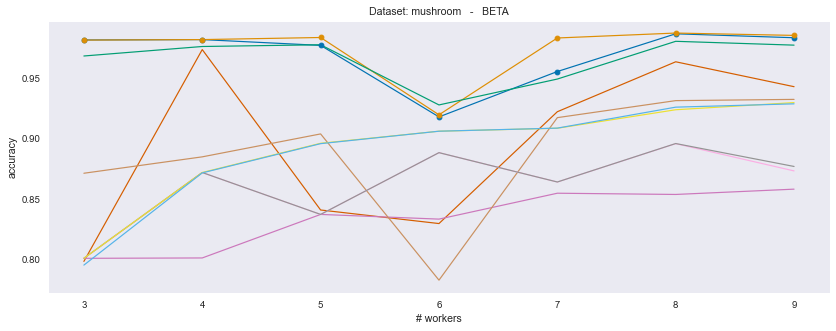

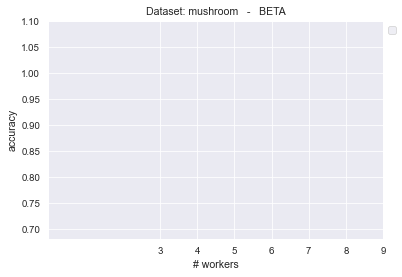

In [29]:
aim1_3_jn_da.plot_comparing_proposed_with_all_benchmarks(re_plot=True, smooth=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 4. Cool Figures </span>

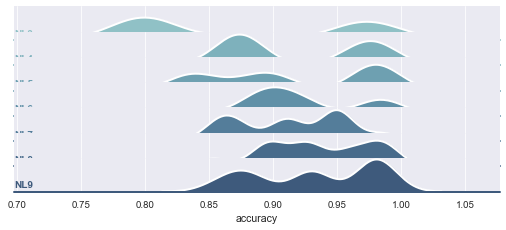

In [30]:
df = aim1_3_jn_da.accuracy_stacked.groupby('strategy').get_group('freq') # ['freq'][ ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed_penalized'] ]
# df = df.melt(id_vars=['seed_num', 'nlabelers'], value_vars=['proposed_penalized', 'proposed_penalized'], var_name='method', value_name='accuracy')

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="nlabelers", hue="nlabelers", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "accuracy", clip_on=False, bw_adjust=.5, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "accuracy", clip_on=False, bw_adjust=.5, color="w", lw=2, )

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "accuracy")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

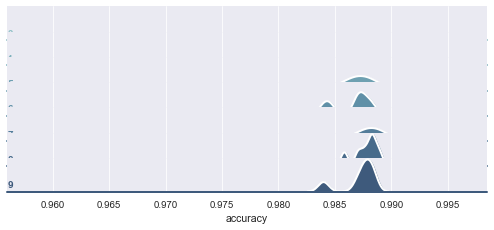

In [31]:
df = aim1_3_jn_da.accuracy_seeds_stacked['freq'][ ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed_penalized'] ]
df = df.melt(id_vars=['seed_num', 'nlabelers'], value_vars=['proposed_penalized', 'proposed_penalized'], var_name='method', value_name='accuracy')

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="nlabelers", hue="nlabelers", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "accuracy",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "accuracy", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "accuracy")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Killing mlflow server </span>
```bash
pkill -f mlflow 
```

In [33]:
# closing the child mlflow session
mlflow_setup.cleanup_mlflow_after_runs()

# closing the ssh session
mlflow_setup.ssh_session.kill()